In [1]:
!git clone https://github.com/ultralytics/ultralytics.git  # Clone YOLOv8
%cd ultralytics
%pip install ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 56939, done.
remote: Counting objects: 100% (799/799), done.
remote: Compressing objects: 100% (384/384), done.
remote: Total 56939 (delta 667), reused 416 (delta 415), pack-reused 56140 (from 5)
Receiving objects: 100% (56939/56939), 31.85 MiB | 27.66 MiB/s, done.
Resolving deltas: 100% (42096/42096), done.
/content/ultralytics
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/

## DATASET

In [ ]:
import os
import shutil
from glob import glob

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="####")
project = rf.workspace("final-year").project("accident")
version = project.version(5)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Accident-severity-detection-5 in yolov11:: 100%|██████████| 18896/18896 [00:04<00:00, 4405.60it/s]


## UJI COBA

In [14]:
import os
from glob import glob

# Konfigurasi path
image_path = '/content/testing/images'
labels_vehicle_path = 'results/test_results_dataset_folder/labels'
folder = 'dataset_folder'  # Ganti dengan nama folder yang sesuai
labels_accident_path = f"/content/{folder}/labels"

# Step 1: Jalankan YOLO untuk prediksi kendaraan
if os.path.exists(image_path):
    print(f"📸 Menjalankan prediksi YOLO di folder: {image_path}")
    !yolo task=detect mode=predict model=/content/best.pt source={image_path} save_txt=True save_conf=True project=results name=test_results_{folder}

In [ ]:
# Konfigurasi path
image_path = '/content/testing/images'
labels_vehicle_path = 'results/test_results_dataset_folder/labels'
labels_accident_path = f"/content/ultralytics/Accident-severity-detection-2/test/labels"

# Step 2: Gabungkan label accident dan vehicle
if os.path.exists(labels_vehicle_path):
    for vehicle_txt_file in glob(os.path.join(labels_vehicle_path, "*.txt")):
        filename = os.path.basename(vehicle_txt_file)
        accident_file = os.path.join(labels_accident_path, filename)

        # Baca label accident (jika ada)
        accident_labels = []
        if os.path.exists(accident_file):
            with open(accident_file, "r") as f:
                accident_labels = f.readlines()

        print(f"\n📄 File: {filename}")
        print("📛 Label Accident:")
        print(accident_labels)

        # Baca label kendaraan dan buang confidence
        vehicle_labels = []
        with open(vehicle_txt_file, "r") as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) >= 6:
                    cls = int(parts[0])
                    bbox = parts[1:5]
                    cls_shifted = str(cls + 2)
                    vehicle_labels.append(" ".join([cls_shifted] + bbox))

        print("🚗 Label Kendaraan (setelah shift class ID +1):")
        print(vehicle_labels)

        # Gabungkan label
        combined_labels = accident_labels + ["\n"] + [v + "\n" for v in vehicle_labels]
        print("🧾 Label Gabungan:")
        print(combined_labels)

        # Lokasi folder gabungan baru
        combined_labels_path = f"/content/labels_combined"

        # Buat foldernya kalau belum ada
        os.makedirs(combined_labels_path, exist_ok=True)

        # Path file tujuan
        combined_file = os.path.join(combined_labels_path, filename)

        # Simpan ke file baru
        with open(combined_file, "w") as f:
            f.writelines(combined_labels)

print("\n✅ Semua label sudah digabungkan dan disimpan dengan print tetap utuh")



📄 File: 1042_jpeg_jpg.rf.e6ac052197cdec749a95ba2f09502e52.txt
📛 Label Accident:
['1 0.57265625 0.1234375 0.1234375 0.18125']
🚗 Label Kendaraan (setelah shift class ID +1):
['4 0.657713 0.431626 0.155635 0.309263', '3 0.411014 0.748078 0.205623 0.503676', '4 0.374284 0.254207 0.0800696 0.138457']
🧾 Label Gabungan:
['1 0.57265625 0.1234375 0.1234375 0.18125', '\n', '4 0.657713 0.431626 0.155635 0.309263\n', '3 0.411014 0.748078 0.205623 0.503676\n', '4 0.374284 0.254207 0.0800696 0.138457\n']

📄 File: 1042_jpeg_jpg.rf.10c16d88eb10799359246c4ac44173a0.txt
📛 Label Accident:
['1 0.57265625 0.1234375 0.1234375 0.18125']
🚗 Label Kendaraan (setelah shift class ID +1):
['3 0.413054 0.74962 0.206211 0.499875', '4 0.655842 0.426705 0.152944 0.30441', '2 0.0890574 0.391905 0.141174 0.274438', '4 0.373164 0.255141 0.0805641 0.13411']
🧾 Label Gabungan:
['1 0.57265625 0.1234375 0.1234375 0.18125', '\n', '3 0.413054 0.74962 0.206211 0.499875\n', '4 0.655842 0.426705 0.152944 0.30441\n', '2 0.0890574 

## MERGE TXT

In [ ]:
import os
import shutil
from glob import glob

# Step 1: Prediksi kendaraan di semua gambar
folders = ["train", "valid", "test"]

for folder in folders:
    image_path = os.path.join(dataset.location, folder, "images")
    if os.path.exists(image_path):
        # Prediksi kendaraan
        !yolo task=detect mode=predict model=/content/best.pt source={image_path} save_txt=True save_conf=True project=results name=test_results_{folder}

# Step 2: Gabungkan label accident + label vehicle
for folder in folders:
    # Lokasi label
    labels_accident_path = os.path.join(dataset.location, folder, "labels")
    labels_vehicle_path = f"/content/ultralytics/results/test_results_{folder}/labels"

    # Pastikan folder label kendaraan ada
    if os.path.exists(labels_vehicle_path):
        for vehicle_txt_file in glob(os.path.join(labels_vehicle_path, "*.txt")):
            filename = os.path.basename(vehicle_txt_file)
            accident_file = os.path.join(labels_accident_path, filename)
            print(f"📄 File: {filename}")

            # Baca label accident (jika ada)
            accident_labels = []
            if os.path.exists(accident_file):
                with open(accident_file, "r") as f:
                    accident_labels = f.readlines()

            # Baca label kendaraan (FIXED: buang confidence)
            vehicle_labels = []
            with open(vehicle_txt_file, "r") as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) >= 6:  # class + x_center + y_center + width + height + confidence
                        cls = int(parts[0])
                        bbox = parts[1:5]  # ambil hanya koordinat
                        cls_shifted = str(cls + 3)  # SHIFT class ID (+1)
                        vehicle_labels.append(" ".join([cls_shifted] + bbox))

            # Gabungkan semua label
            combined_labels = accident_labels + ["\n"] + [v + "\n" for v in vehicle_labels]
            print("🧾 Label Gabungan:", combined_labels)

            # Tulis ulang ke file accident
            with open(accident_file, "w") as f:
                f.writelines(combined_labels)

print("✅ Semua label sudah digabungkan dengan benar!")

# Step 3: Zip hasil
!zip -r /content/results-accident-04.zip {dataset.location}

# Step 4: Download ke lokal
from google.colab import files
files.download('/content/results-accident-04.zip')

Streaming output truncated to the last 5000 lines.
  adding: content/ultralytics/Accident-severity-detection-5/train/images/traffic_img463_jpg.rf.8ee28da93d10859a7ac96d8bf2ae31e6.jpg (deflated 0%)
  adding: content/ultralytics/Accident-severity-detection-5/train/images/accidentFrame3013_jpg.rf.2b6975bdd1b5b177435559df4a02bee3.jpg (deflated 1%)
  adding: content/ultralytics/Accident-severity-detection-5/train/images/7db827fb-e15d-4315-9f0a-16c8d38f9d5c_1920x1080_jpg.rf.11e14127165a42702f2328631567762f.jpg (deflated 1%)
  adding: content/ultralytics/Accident-severity-detection-5/train/images/screen_images3_png_jpg.rf.42cf4487fd3ca624fdd16c2635a17709.jpg (deflated 0%)
  adding: content/ultralytics/Accident-severity-detection-5/train/images/severityV2_4_jpg.rf.0803ab5e361a42551f0dc55278e3ad10.jpg (deflated 1%)
  adding: content/ultralytics/Accident-severity-detection-5/train/images/FLIP_CAR_V116_jpg.rf.a29f8467a116248d6b91e0595cf35c8a.jpg (deflated 1%)
  adding: content/ultralytics/Acciden

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Pertama, mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Lalu ekstrak ZIP ke folder tujuan
import zipfile
zip_path = '/content/results-accident-04.zip'  # file zip kamu
extract_to = '/content/drive/MyDrive/UNJ/Skripsi - UNJ/DATA'  # gdrive tujuan

# Buat folder kalau belum ada
os.makedirs(extract_to, exist_ok=True)

# Ekstrak
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ ZIP berhasil diekstrak ke Google Drive!")

Mounted at /content/drive
✅ ZIP berhasil diekstrak ke Google Drive!


In [ ]:
dataset = "/content/drive/MyDrive/UNJ/Skripsi - UNJ/DATA/final-vehicle-dataset-5.v1i.yolov11"

In [ ]:
!yolo task=detect mode=train model=yolo11n.pt data="{dataset}/data.yaml" epochs=1000 imgsz=640 batch=-1 save_period=50 plots=True

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/UNJ/Skripsi - UNJ/DATA/final-vehicle-dataset-5.v1i.yolov11/data.yaml, epochs=1000, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=50, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fals

## Others

In [ ]:
import os
import shutil
from glob import glob

# Step 1: Prediksi kendaraan di semua gambar
folders = ["train", "valid", "test"]

for folder in folders:
    image_path = os.path.join(dataset.location, folder, "images")
    if os.path.exists(image_path):
        # Prediksi kendaraan
        !yolo task=detect mode=predict model=/content/best.pt source={image_path} save_txt=True save_conf=True project=results name=test_results_{folder}

# Step 2: Gabungkan label accident + label vehicle
for folder in folders:
    # Lokasi label
    labels_accident_path = os.path.join(dataset.location, folder, "labels")
    labels_vehicle_path = f"/content/ultralytics/results/test_results_{folder}/labels"

    # Pastikan folder label kendaraan ada
    if os.path.exists(labels_vehicle_path):
        for vehicle_txt_file in glob(os.path.join(labels_vehicle_path, "*.txt")):
            filename = os.path.basename(vehicle_txt_file)
            accident_file = os.path.join(labels_accident_path, filename)

            # Baca dan shift label accident (+4)
            accident_labels = []
            if os.path.exists(accident_file):
                with open(accident_file, "r") as f:
                    for line in f:
                        parts = line.strip().split()
                        if len(parts) >= 5:  # class + bbox (tanpa confidence)
                            cls = int(parts[0])
                            bbox = parts[1:5]
                            cls_shifted = str(cls + 4)  # SHIFT class ID (+4 untuk accident)
                            accident_labels.append(" ".join([cls_shifted] + bbox))

            # Baca label kendaraan (buang confidence, shift +1)
            vehicle_labels = []
            with open(vehicle_txt_file, "r") as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) >= 6:  # class + x_center + y_center + width + height + confidence
                        cls = int(parts[0])
                        bbox = parts[1:5]
                        cls_shifted = str(cls + 1)  # SHIFT class ID (+1 untuk vehicle)
                        vehicle_labels.append(" ".join([cls_shifted] + bbox))

            # Gabungkan semua label
            combined_labels = [a + "\n" for a in accident_labels] + [v + "\n" for v in vehicle_labels]

            # Tulis ulang ke file accident
            with open(accident_file, "w") as f:
                f.writelines(combined_labels)

print("✅ Semua label sudah digabungkan dan shift class ID dengan benar!")

# Step 3: Zip hasil
!zip -r /content/results-accident-04.zip {dataset.location}

# Step 4: Download ke lokal
from google.colab import files
files.download('/content/results-accident-04.zip')


In [ ]:
# 1. Zip foldernya
!zip -r /content/before-accident-04.zip /content/ultralytics/Accident-severity-detection-2

# 2. Download zip file
from google.colab import files
files.download('/content/before-accident-04.zip')

Streaming output truncated to the last 5000 lines.
  adding: content/ultralytics/Accident-severity-detection-2/train/images/accidentFrame123_jpg.rf.8136f7d4cd2317db33bcc32aadc2a5e0.jpg (deflated 0%)
  adding: content/ultralytics/Accident-severity-detection-2/train/images/traffic_img1464_jpg.rf.3d1e1270ea901b0b29f691afb3c7d45a.jpg (deflated 2%)
  adding: content/ultralytics/Accident-severity-detection-2/train/images/severityV4_76_jpg.rf.45cbd299d410b729918d4857abded0b3.jpg (deflated 1%)
  adding: content/ultralytics/Accident-severity-detection-2/train/images/Severity_Detect_V22_jpg.rf.27bcce3e3676ac2b1c18b6f09256a590.jpg (deflated 1%)
  adding: content/ultralytics/Accident-severity-detection-2/train/images/severV12_jpg.rf.107b38cee4d1fdd89621083aa180bcf0.jpg (deflated 0%)
  adding: content/ultralytics/Accident-severity-detection-2/train/images/accidentFrame2721_jpg.rf.0d53757d74a260d20dcd9da079a36dd2.jpg (deflated 2%)
  adding: content/ultralytics/Accident-severity-detection-2/train/ima

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Roboflow

In [ ]:
import os
import shutil
from glob import glob

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="###")
project = rf.workspace("final-year").project("accident-severity")
version = project.version(2)
dataset = version.download("yolov11")

# Step 2: Inference semua gambar (train, valid, test)
folders = ["train", "valid", "test"]

for folder in folders:
    image_path = os.path.join(dataset.location, folder, "images")
    if os.path.exists(image_path):
        !yolo task=detect mode=predict model=/content/best.pt source={image_path} save_txt=True save_conf=True project=results name=test_results_{folder}

# 1. Zip foldernya
!zip -r /content/results-accident-04.zip /content/ultralytics/results

# 2. Download zip file
from google.colab import files
files.download('/content/results-accident-04.zip')

Streaming output truncated to the last 5000 lines.
  adding: content/ultralytics/results/test_results_train/labels/argusAcc35_jpg.rf.5647e0c62bdda7ae8ad196f94dd2b461.txt (deflated 9%)
  adding: content/ultralytics/results/test_results_train/labels/vlcsnap-2020-01-17-03h47m27s334_png.rf.5efd55a6e03a063f2ff09af2f19c6957.txt (deflated 50%)
  adding: content/ultralytics/results/test_results_train/labels/acc1446_jpg.rf.321eebdaed683e06beff5dd23dea80be.txt (deflated 28%)
  adding: content/ultralytics/results/test_results_train/labels/accidentFrame1130_jpg.rf.fec0394e21fee1a1bf76a213ab88d41d.txt (deflated 33%)
  adding: content/ultralytics/results/test_results_train/labels/vlcsnap-2020-01-16-01h36m15s797_png.rf.992128e5386723d662637a370880e7ea.txt (deflated 9%)
  adding: content/ultralytics/results/test_results_train/labels/acc995_jpg.rf.bcd6345d81f672510f77ad602cd4cf87.txt (deflated 35%)
  adding: content/ultralytics/results/test_results_train/labels/frame_2436_jpg.rf.ae59c036b8bf5d666040cbd

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 1. Zip foldernya
!zip -r /content/results-accident-01.zip /content/ultralytics/results

# 2. Download zip file
from google.colab import files
files.download('/content/results-accident-01.zip')

Streaming output truncated to the last 5000 lines.
  adding: content/ultralytics/results/test_results_train/labels/argusAcc35_jpg.rf.5647e0c62bdda7ae8ad196f94dd2b461.txt (deflated 9%)
  adding: content/ultralytics/results/test_results_train/labels/vlcsnap-2020-01-17-03h47m27s334_png.rf.5efd55a6e03a063f2ff09af2f19c6957.txt (deflated 50%)
  adding: content/ultralytics/results/test_results_train/labels/acc1446_jpg.rf.321eebdaed683e06beff5dd23dea80be.txt (deflated 28%)
  adding: content/ultralytics/results/test_results_train/labels/accidentFrame1130_jpg.rf.fec0394e21fee1a1bf76a213ab88d41d.txt (deflated 33%)
  adding: content/ultralytics/results/test_results_train/labels/vlcsnap-2020-01-16-01h36m15s797_png.rf.992128e5386723d662637a370880e7ea.txt (deflated 9%)
  adding: content/ultralytics/results/test_results_train/labels/acc995_jpg.rf.bcd6345d81f672510f77ad602cd4cf87.txt (deflated 35%)
  adding: content/ultralytics/results/test_results_train/labels/frame_2436_jpg.rf.ae59c036b8bf5d666040cbd

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
from glob import glob

# Path label accident dari dataset Roboflow
base_accident_labels_dir = os.path.join(dataset.location)
# Path hasil YOLO vehicle detection
base_vehicle_labels_dir = '/content/ultralytics/results'

# Output gabungan
output_base_dir = '/content/merged_labels'
os.makedirs(output_base_dir, exist_ok=True)

# Daftar folder
folders = ['train', 'valid', 'test']

for folder in folders:
    print(f"Processing folder: {folder}")

    accident_labels_dir = os.path.join(base_accident_labels_dir, folder, 'labels')
    vehicle_labels_dir = os.path.join(base_vehicle_labels_dir, f'test_results_{folder}', 'labels')
    output_labels_dir = os.path.join(output_base_dir, folder)
    os.makedirs(output_labels_dir, exist_ok=True)

    accident_label_files = glob(os.path.join(accident_labels_dir, '*.txt'))

    for accident_label_file in accident_label_files:
        filename = os.path.basename(accident_label_file)
        accident_lines = []
        vehicle_lines = []

        # Baca label accident
        with open(accident_label_file, 'r') as f:
            accident_lines = f.readlines()

        # Cek file vehicle
        vehicle_label_file = os.path.join(vehicle_labels_dir, filename)
        if os.path.exists(vehicle_label_file):
            with open(vehicle_label_file, 'r') as f:
                vehicle_lines = f.readlines()

            # Update class index vehicle
            updated_vehicle_lines = []
            for line in vehicle_lines:
                parts = line.strip().split()
                vehicle_class = int(parts[0])
                if vehicle_class == 0:
                    parts[0] = '1'  # bus
                elif vehicle_class == 1:
                    parts[0] = '2'  # car
                elif vehicle_class == 2:
                    parts[0] = '3'  # truck
                else:
                    continue  # Skip kalau class ga dikenal
                updated_vehicle_lines.append(' '.join(parts) + '\n')

            # Gabung accident + vehicle
            merged_lines = accident_lines + updated_vehicle_lines
        else:
            merged_lines = accident_lines

        # Simpan file baru
        output_file = os.path.join(output_labels_dir, filename)
        with open(output_file, 'w') as f:
            f.writelines(merged_lines)

print("Semua folder selesai digabung!")

Processing folder: train
Processing folder: valid
Processing folder: test
Semua folder selesai digabung!


In [ ]:
!zip -r /content/merged_labels.zip /content/merged_labels
from google.colab import files
files.download('/content/merged_labels.zip')

In [ ]:
import os
import glob
import shutil
import zipfile

# Path asal label dan gambar

gt_path = "/content/ultralytics/vehicle-002-2/test/labels"
image_path = "/content/ultralytics/vehicle-002-2/test/images"
pred_path = "/content/ultralytics/results/test_results/labels"

# Folder sementara
wrong_gt_dir = "/content/wrong_gt_labels"
wrong_pred_dir = "/content/wrong_pred_labels"
wrong_img_dir = "/content/wrong_images"
os.makedirs(wrong_gt_dir, exist_ok=True)
os.makedirs(wrong_pred_dir, exist_ok=True)
os.makedirs(wrong_img_dir, exist_ok=True)

def load_classes(file_path):
    if not os.path.exists(file_path):
        return []
    with open(file_path, 'r') as f:
        lines = f.read().strip().split('\n')
        return sorted([line.split()[0] for line in lines if line.strip()])

wrong_predictions = []

for gt_file in glob.glob(os.path.join(gt_path, '*.txt')):
    file_name = os.path.basename(gt_file)
    pred_file = os.path.join(pred_path, file_name)

    gt_classes = load_classes(gt_file)
    pred_classes = load_classes(pred_file)

    if gt_classes != pred_classes:
        wrong_predictions.append(file_name)

        # Copy label files
        shutil.copy(gt_file, os.path.join(wrong_gt_dir, file_name))
        if os.path.exists(pred_file):
            shutil.copy(pred_file, os.path.join(wrong_pred_dir, file_name))

        # Copy image file (.jpg or .png) if exists
        base_name = os.path.splitext(file_name)[0]
        for ext in ['.jpg', '.png']:
            img_file = os.path.join(image_path, base_name + ext)
            if os.path.exists(img_file):
                shutil.copy(img_file, os.path.join(wrong_img_dir, base_name + ext))
                break  # stop setelah ketemu 1

# Zip semua folder
shutil.make_archive("wrong_gt_labels", 'zip', wrong_gt_dir)
shutil.make_archive("wrong_pred_labels", 'zip', wrong_pred_dir)
shutil.make_archive("wrong_images", 'zip', wrong_img_dir)

print(f"Total file salah: {len(wrong_predictions)}")
print("✅ ZIP file berhasil dibuat:")
print("- wrong_gt_labels.zip")
print("- wrong_pred_labels.zip")
print("- wrong_images.zip")

Total file salah: 524
✅ ZIP file berhasil dibuat:
- wrong_gt_labels.zip
- wrong_pred_labels.zip
- wrong_images.zip


In [ ]:
!zip -r /content/wrong_gt_labels.zip /content/wrong_gt_labels
!zip -r /content/wrong_pred_labels.zip /content/wrong_pred_labels

  adding: content/wrong_gt_labels/ (stored 0%)
  adding: content/wrong_gt_labels/pic12801_png.rf.259000d43f0b772f6c8e77c3a092f845.txt (deflated 53%)
  adding: content/wrong_gt_labels/000033_jpg.rf.baa1adc255687a4675038f75fad56e27.txt (deflated 53%)
  adding: content/wrong_gt_labels/000035_night_jpg.rf.4208404b9abcb6a9b1af941c41b6eb49.txt (deflated 62%)
  adding: content/wrong_gt_labels/video-online-video-cutter_com-_mp4-122_jpg.rf.99341be64785687cb6fda74a7cf15219.txt (deflated 36%)
  adding: content/wrong_gt_labels/pic00801_png.rf.272bb90ea2f070558c05fcf06a75a364.txt (deflated 60%)
  adding: content/wrong_gt_labels/000247_jpg.rf.2701d99b45c0bb6df913ee52180ba524.txt (deflated 61%)
  adding: content/wrong_gt_labels/001428_jpg.rf.6ce530152592d7cb9fb5ed77fe58b481.txt (deflated 53%)
  adding: content/wrong_gt_labels/yt-56nb3C3NRz0-0071_jpg.rf.06e7ab3c70ecbbd2e0cf178882c29179.txt (deflated 45%)
  adding: content/wrong_gt_labels/pic42161_png.rf.4d6a25ea2dbd48d1ccaff793890bdc9f.txt (deflated 6

In [ ]:
!zip -r /content/wrong_images.zip /content/wrong_images

  adding: content/wrong_images/ (stored 0%)
  adding: content/wrong_images/000160_jpg.rf.330e4bda15079f2db59cec49fb11c59f.jpg (deflated 4%)
  adding: content/wrong_images/highway_2561_2020-08-26_jpg.rf.ee41ad3d5004ad329d7e18f4867321a6.jpg (deflated 0%)
  adding: content/wrong_images/ulu2885_jpg.rf.5737a3bb949689021e9eda97a2bdaabd.jpg (deflated 0%)
  adding: content/wrong_images/ulu2890_jpg.rf.35e54ae033a1d2bbf6180008dc122deb.jpg (deflated 1%)
  adding: content/wrong_images/pic25761_png.rf.11e57f908c28ab959968802267092fe3.jpg (deflated 7%)
  adding: content/wrong_images/005655_jpg.rf.e2a095d06e9ae3466801d4436352af11.jpg (deflated 0%)
  adding: content/wrong_images/000041_jpg.rf.deaa09b0aefed8243f13043f4ed56d19.jpg (deflated 0%)
  adding: content/wrong_images/000388_jpg.rf.39375da9d226166eeda0a27e1830c72f.jpg (deflated 1%)
  adding: content/wrong_images/ulu2873_jpg.rf.90e4f4f14931cc2f955fc8b425dff3e4.jpg (deflated 0%)
  adding: content/wrong_images/20240705_201151-mp4_20240707_172802-966

## CHECKING WRONG LABEL

In [11]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="####")
project = rf.workspace("finalvehicle").project("final-vehicle")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


In [12]:
from ultralytics import YOLO
import os

# Load model
model = YOLO("/content/best.pt")  # Ganti path ke model kamu

# Path ke gambar validasi
val_folder = dataset.location + "/valid/images"  # otomatis dari dataset roboflow

# Inference semua gambar
results = model(val_folder, save_txt=True, save_conf=True)


image 1/679 /content/ultralytics/final-vehicle-dataset-5-1/valid/images/-12-HDCondellJoseMiguelInfante_2020-08-04_07h30min00s000ms-019_jpg.rf.ac3b8fe31af3d59074c2382c3b9ec27d.jpg: 480x640 1 bus, 4 cars, 13.3ms
image 2/679 /content/ultralytics/final-vehicle-dataset-5-1/valid/images/-12-HDCondellJoseMiguelInfante_2020-08-04_07h30min00s000ms-027_jpg.rf.c8284df38237b3265dcb95f724299526.jpg: 480x640 1 bus, 4 cars, 10.9ms
image 3/679 /content/ultralytics/final-vehicle-dataset-5-1/valid/images/-12-HDCondellJoseMiguelInfante_2020-08-04_07h30min00s000ms-038_jpg.rf.fe4872d11f1f1d85dd944c8ef6d284ad.jpg: 480x640 2 buss, 1 car, 13.8ms
image 4/679 /content/ultralytics/final-vehicle-dataset-5-1/valid/images/-12-HDCondellJoseMiguelInfante_2020-08-04_07h30min00s000ms-040_jpg.rf.cded9af9c00cbc2562dbdad38b6be141.jpg: 480x640 3 buss, 4 cars, 11.3ms
image 5/679 /content/ultralytics/final-vehicle-dataset-5-1/valid/images/-12-HDCondellJoseMiguelInfante_2020-08-04_07h30min00s000ms-075_jpg.rf.da0406fb7033fef5

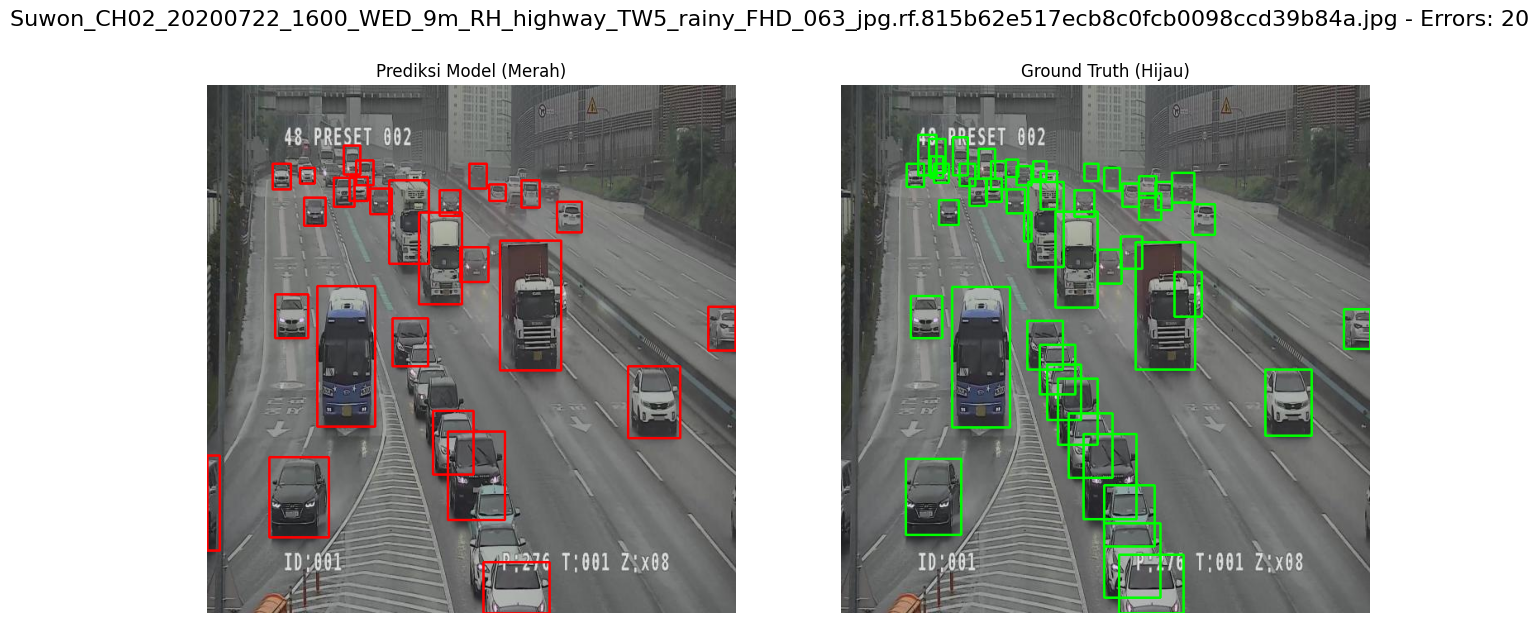

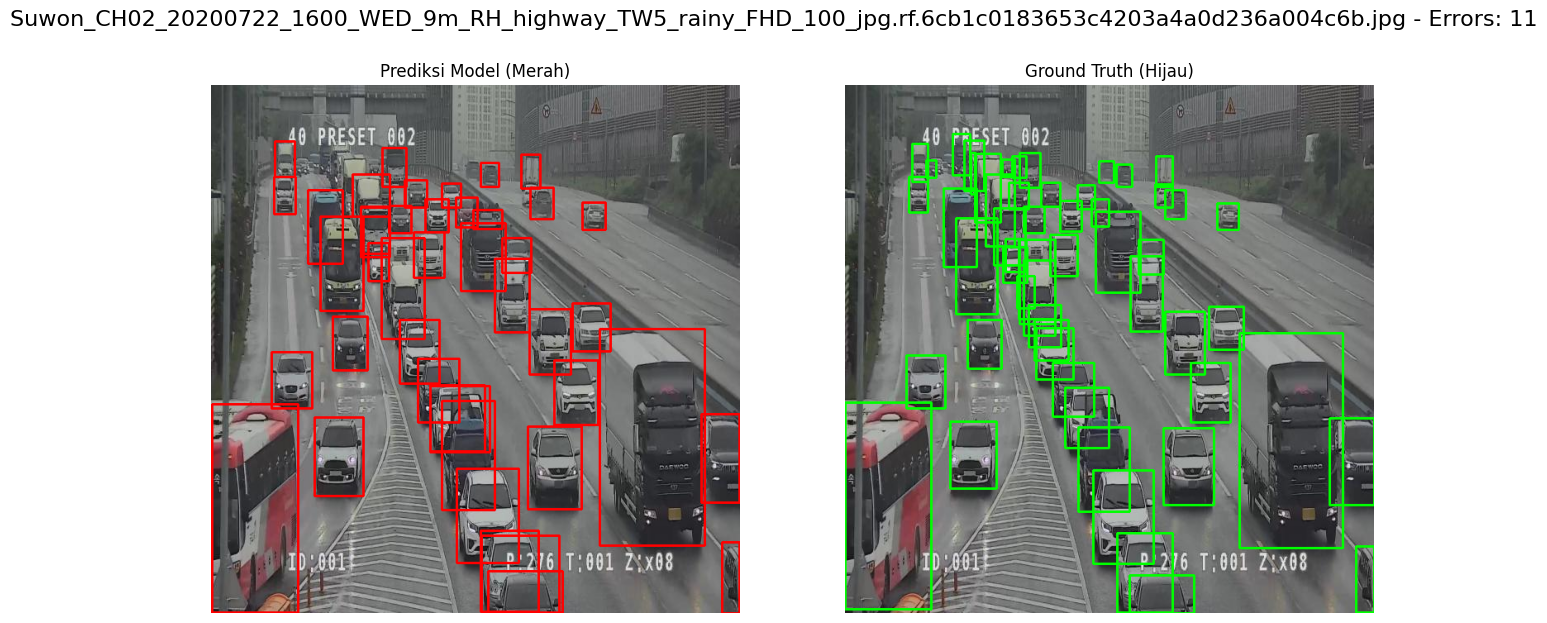

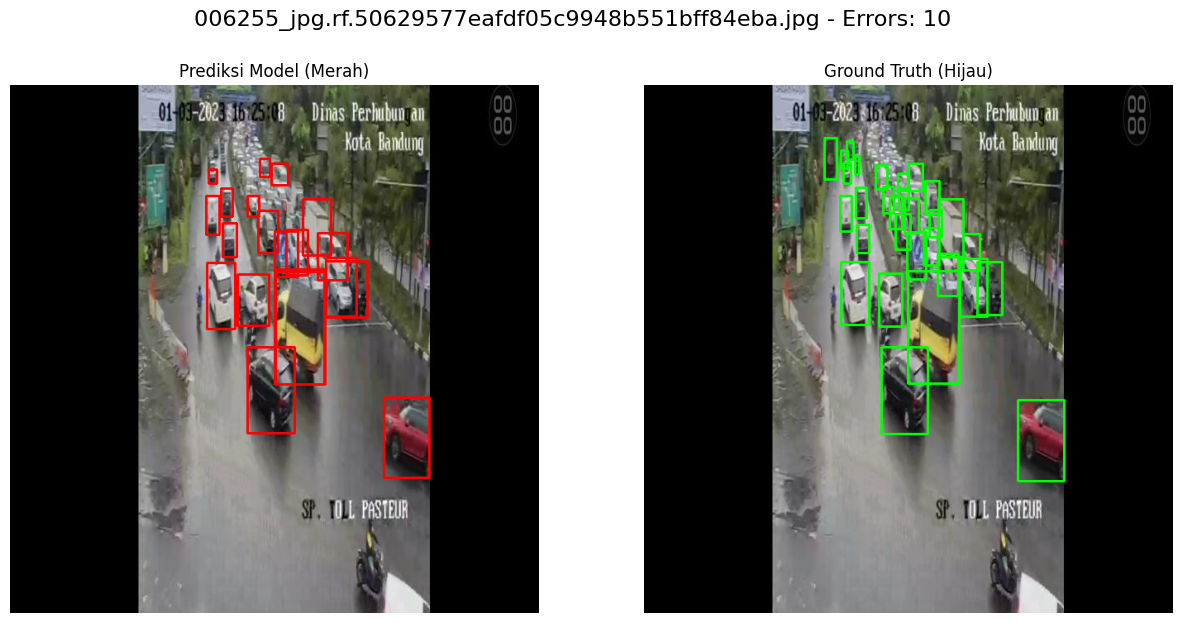

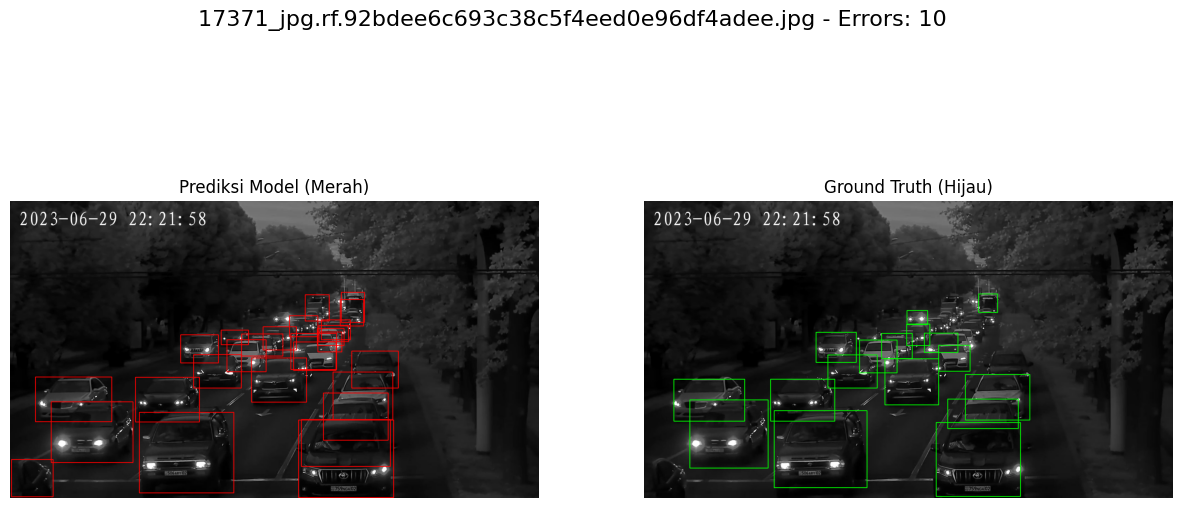

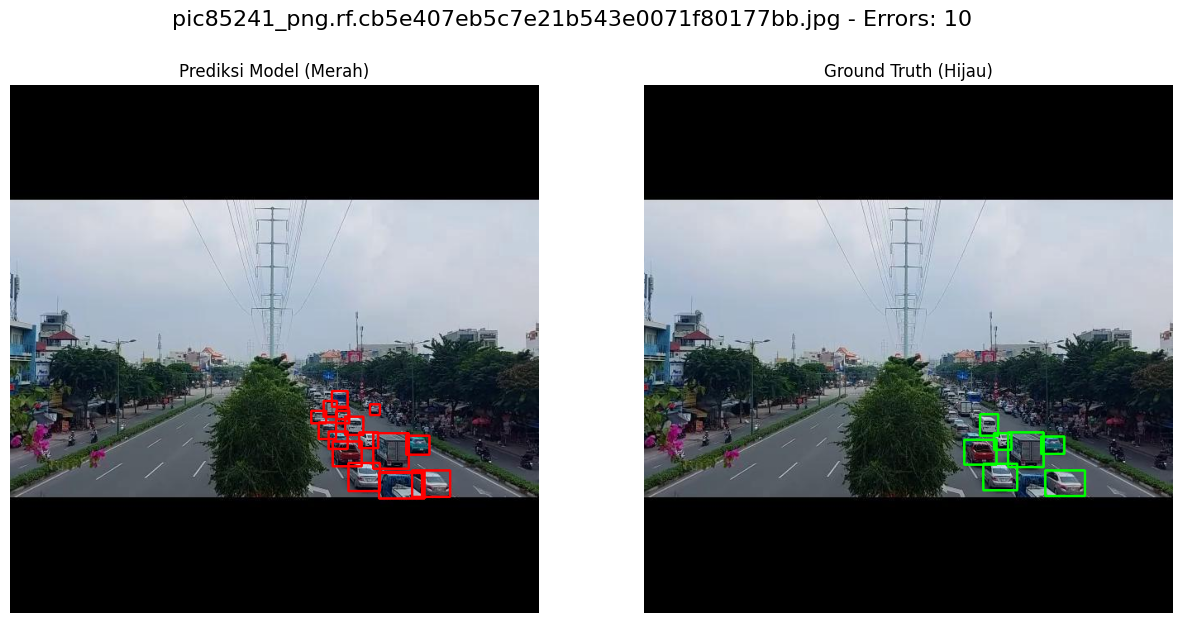

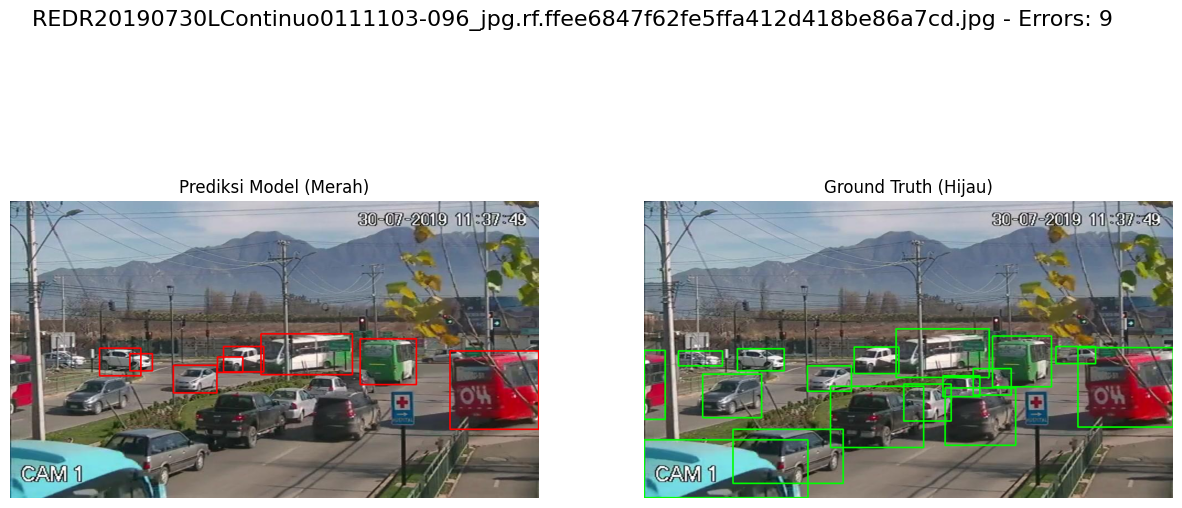

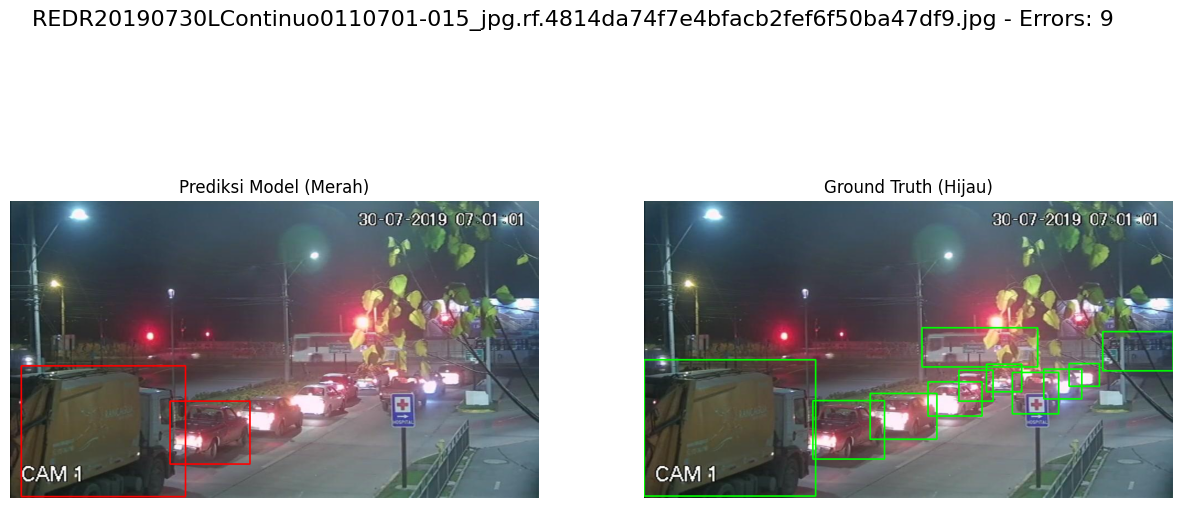

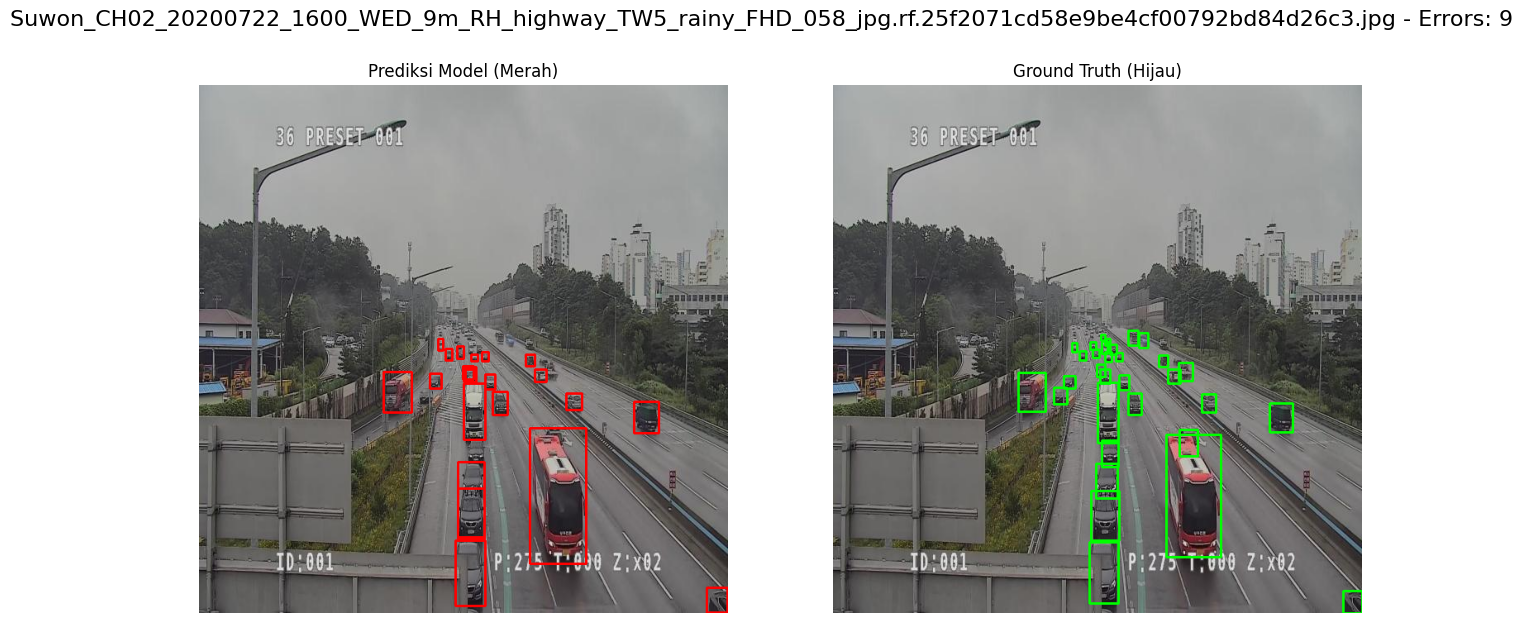

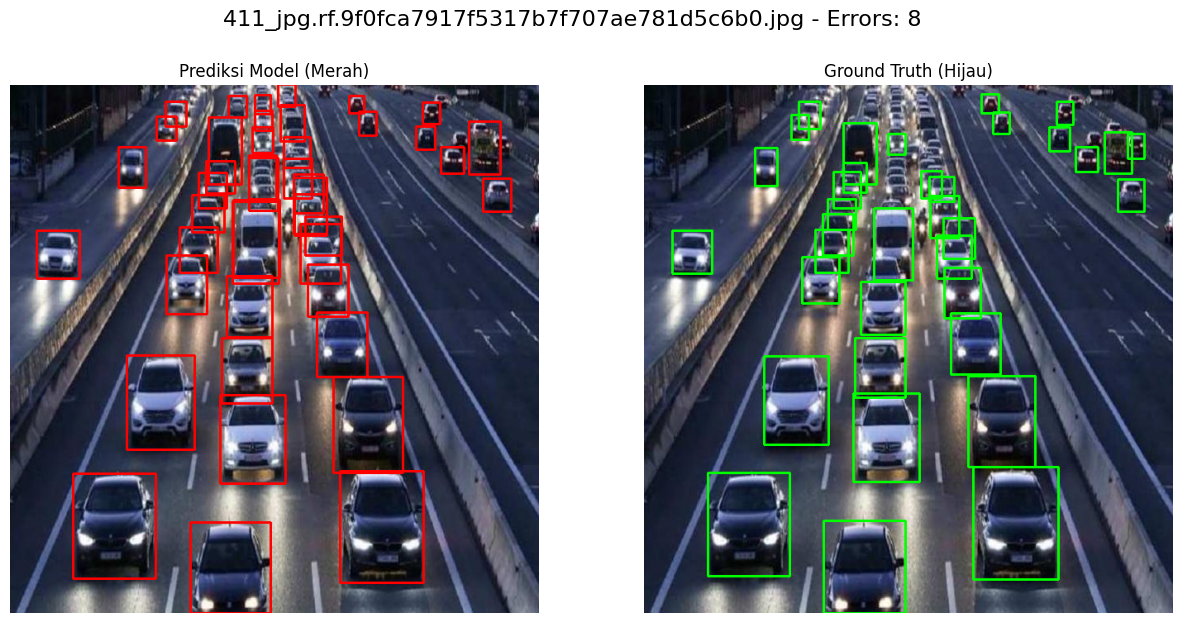

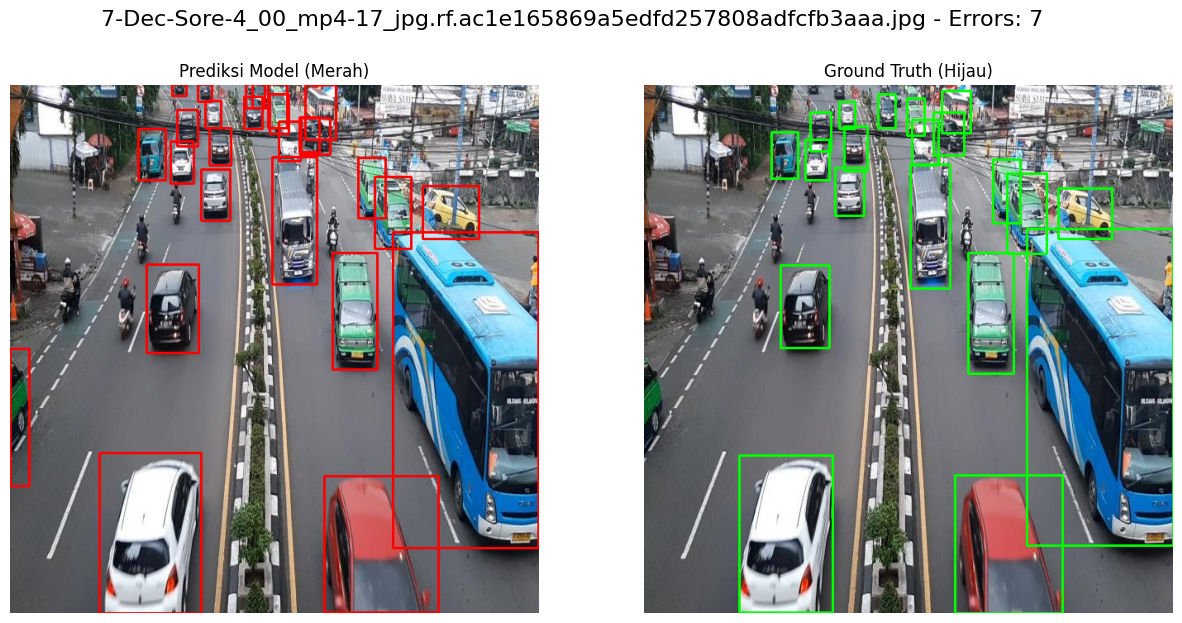

In [13]:
import os
import glob
import cv2
import matplotlib.pyplot as plt

# Path
pred_labels_path = "runs/detect/predict/labels"
gt_labels_path = dataset.location + "/valid/labels"
img_dir = dataset.location + "/valid/images"

error_count = {}
wrong_boxes = {}  # Simpan bbox yang salah per gambar

def load_labels(label_path):
    """ Load YOLO format label: class, x_center, y_center, width, height """
    labels = []
    if not os.path.exists(label_path):
        return labels
    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            labels.append([int(parts[0])] + [float(x) for x in parts[1:]])
    return labels

# Loop semua ground truth
for label_file in glob.glob(gt_labels_path + "/*.txt"):
    filename = os.path.basename(label_file)
    pred_file = os.path.join(pred_labels_path, filename)

    gt_labels = load_labels(label_file)
    pred_labels = load_labels(pred_file)

    # Simple: hitung miss berdasarkan jumlah bbox
    diff = abs(len(gt_labels) - len(pred_labels))

    error_count[filename.replace('.txt', '.jpg')] = diff
    wrong_boxes[filename.replace('.txt', '.jpg')] = {
        "pred": pred_labels,
        "gt": gt_labels
    }

# Sort berdasarkan error terbanyak
sorted_errors = sorted(error_count.items(), key=lambda x: x[1], reverse=True)
top_100 = sorted_errors[:10]

# Gambar
for img_name, err in top_100:
    img_path = os.path.join(img_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img_pred = img.copy()
    img_gt = img.copy()

    h, w, _ = img.shape

    # Gambar prediksi (merah)
    for pred in wrong_boxes[img_name]["pred"]:
        cls, xc, yc, bw, bh, acc = pred
        x1 = int((xc - bw/2) * w)
        y1 = int((yc - bh/2) * h)
        x2 = int((xc + bw/2) * w)
        y2 = int((yc + bh/2) * h)
        cv2.rectangle(img_pred, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Red box

    # Gambar ground truth (hijau)
    for gt in wrong_boxes[img_name]["gt"]:
        cls, xc, yc, bw, bh = gt
        x1 = int((xc - bw/2) * w)
        y1 = int((yc - bh/2) * h)
        x2 = int((xc + bw/2) * w)
        y2 = int((yc + bh/2) * h)
        cv2.rectangle(img_gt, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box

    # Plot keduanya side by side
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))
    fig.suptitle(f"{img_name} - Errors: {err}", fontsize=16)

    axes[0].imshow(img_pred)
    axes[0].set_title("Prediksi Model (Merah)")
    axes[0].axis('off')

    axes[1].imshow(img_gt)
    axes[1].set_title("Ground Truth (Hijau)")
    axes[1].axis('off')

    plt.show()


## Check Fire Training


image 1/1 /content/Screenshot 2025-04-13 234925.png: 800x736 1 smoke, 898.4ms
Speed: 7.8ms preprocess, 898.4ms inference, 1.0ms postprocess per image at shape (1, 3, 800, 736)


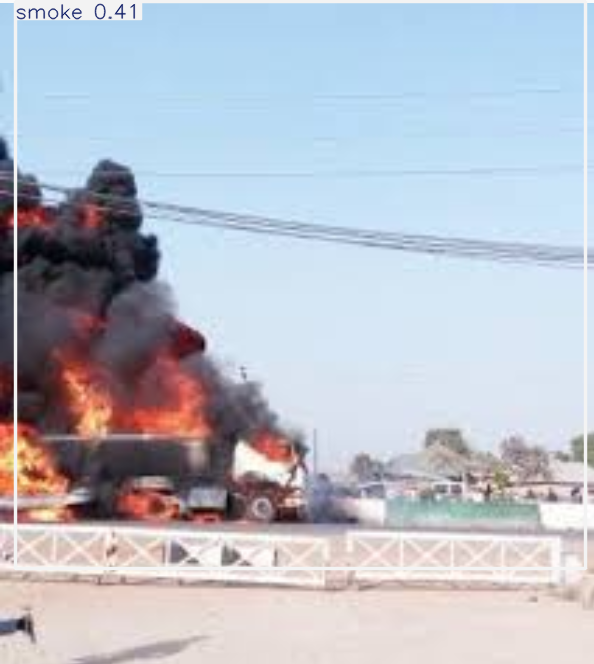

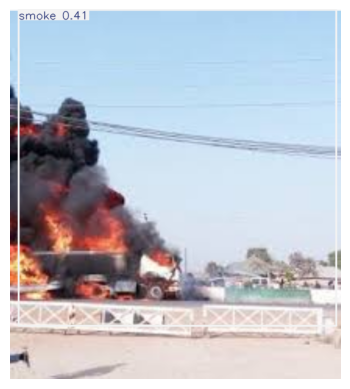

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Load model
model = YOLO("/content/fire.pt")

# Predict
results = model("/content/Screenshot 2025-04-13 234925.png")  # list of one result

# Show hasil deteksi langsung
results[0].show()  # ini akan pop up jendela (kalau environment mendukung)

# Simpan hasil deteksi ke file
results[0].save(filename="deteksi.png")

# Tampilkan dalam notebook / Google Colab
img = cv2.imread("deteksi.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis("off")
plt.show()